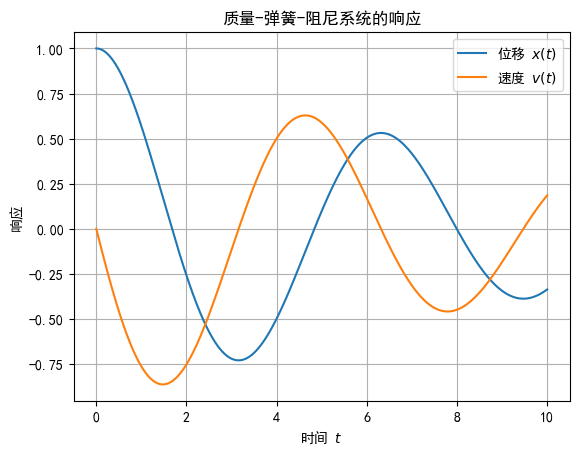

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 设置字体为SimHei（黑体），防止中文显示乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 定义系统参数
m = 1.0  # 质量
c = 0.2  # 阻尼系数
k = 1.0  # 弹簧常数

# 定义二阶方程的右侧
def mass_spring_damper(t, y):
    x, v = y
    dxdt = v
    dvdt = -(c/m) * v - (k/m) * x
    return [dxdt, dvdt]

# 初始条件
x0 = 1.0  # 初始位移
v0 = 0.0  # 初始速度

# 定义时间范围
t_span = [0, 10]  # 模拟的时间范围
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # 定义时间点

# 求解微分方程
sol = solve_ivp(mass_spring_damper, t_span, [x0, v0], t_eval=t_eval)

# 绘制结果
plt.plot(sol.t, sol.y[0], label='位移 $x(t)$')
plt.plot(sol.t, sol.y[1], label='速度 $v(t)$')
plt.title('质量-弹簧-阻尼系统的响应')
plt.xlabel('时间 $t$')
plt.ylabel('响应')
plt.legend()
plt.grid()
plt.show()



In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 设置 SymPy 打印格式
sp.init_printing(use_latex='mathjax')

# 定义符号变量
t, s = sp.symbols('t s', real=True)
m, c, k = sp.symbols('m c k', positive=True)
x0, v0 = sp.symbols('x0 v0')

# 定义拉普拉斯域的 X(s)
X = (m*(s*x0 + v0) + c*x0) / (m*s**2 + c*s + k)

# 部分分式分解
X_partial = sp.apart(X, s)

print("部分分式分解后的 X(s):")
display(X_partial)

# 计算逆拉普拉斯变换，得到 x(t)
x_t = sp.inverse_laplace_transform(X, s, t)
print("\n时域解 x(t):")
display(x_t)


部分分式分解后的 X(s):


c⋅x₀ + m⋅s⋅x₀ + m⋅v₀
────────────────────
                2   
   c⋅s + k + m⋅s    


时域解 x(t):


⎛                            -c⋅t     ⎛     ______________⎞                ⎛  
⎜                            ─────    ⎜    ╱    2         ⎟                ⎜  
⎜    ⎛  c⋅x₀   c⋅x₀ + m⋅v₀⎞   2⋅m     ⎜t⋅╲╱  - c  + 4⋅k⋅m ⎟       -c⋅t     ⎜  
⎜2⋅m⋅⎜- ──── + ───────────⎟⋅ℯ     ⋅sin⎜───────────────────⎟       ─────    ⎜t⋅
⎜    ⎝  2⋅m         m     ⎠           ⎝        2⋅m        ⎠        2⋅m     ⎜  
⎜────────────────────────────────────────────────────────── + x₀⋅ℯ     ⋅cos⎜──
⎜                       ______________                                     ⎝  
⎜                      ╱    2                                                 
⎝                    ╲╱  - c  + 4⋅k⋅m                                         

     ____________⎞⎞     
    ╱    2       ⎟⎟     
   ╱    c        ⎟⎟     
  ╱   - ── + k⋅m ⎟⎟     
╲╱      4        ⎟⎟     
─────────────────⎟⎟⋅θ(t)
       m         ⎠⎟     
                  ⎟     
                  ⎠     

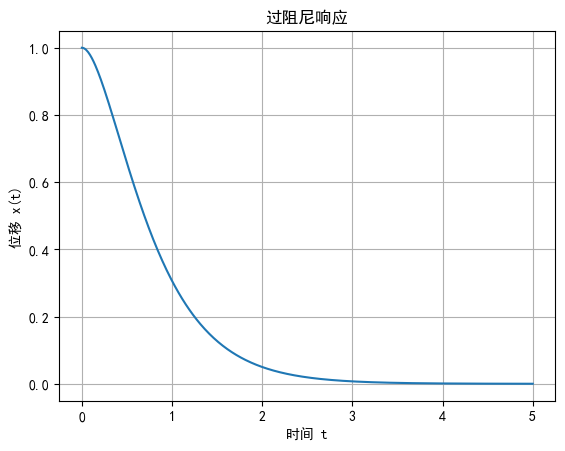

In [4]:
# 参数
m_val = 1
c_val = 5
k_val = 6
x0_val = 1
v0_val = 0

# 特征根
s1 = (-c_val + np.sqrt(c_val**2 - 4*m_val*k_val)) / (2*m_val)
s2 = (-c_val - np.sqrt(c_val**2 - 4*m_val*k_val)) / (2*m_val)

# 求解系数 A1, A2
A = np.array([[1, 1], [s1, s2]])
B = np.array([x0_val, v0_val])
A1, A2 = np.linalg.solve(A, B)

# 时间范围
t_vals = np.linspace(0, 5, 500)
x_vals = A1 * np.exp(s1 * t_vals) + A2 * np.exp(s2 * t_vals)

# 绘图
plt.plot(t_vals, x_vals)
plt.title('过阻尼响应')
plt.xlabel('时间 t')
plt.ylabel('位移 x(t)')
plt.grid(True)
plt.show()


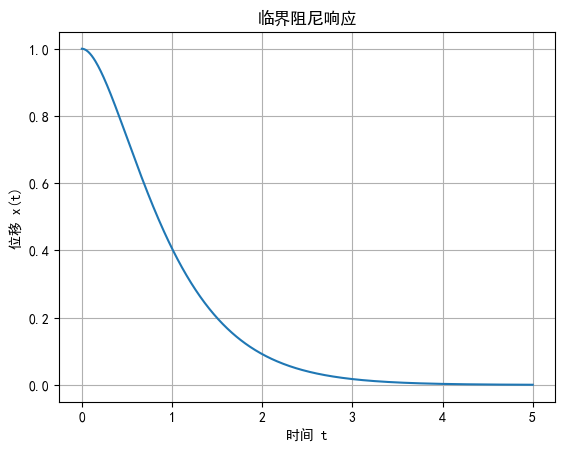

In [5]:
# 参数
m_val = 1
c_val = 4
k_val = 4
x0_val = 1
v0_val = 0

# 特征根
s = -c_val / (2 * m_val)

# 求解系数 A, B
A = x0_val
B = v0_val - s * x0_val

# 时间范围
t_vals = np.linspace(0, 5, 500)
x_vals = (A + B * t_vals) * np.exp(s * t_vals)

# 绘图
plt.plot(t_vals, x_vals)
plt.title('临界阻尼响应')
plt.xlabel('时间 t')
plt.ylabel('位移 x(t)')
plt.grid(True)
plt.show()


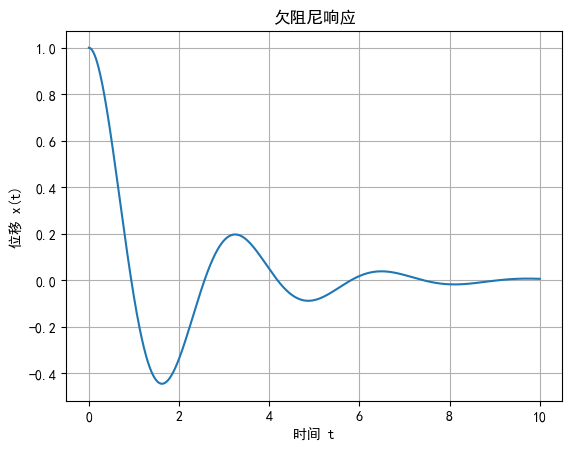

In [6]:
# 参数
m_val = 1
c_val = 1
k_val = 4
x0_val = 1
v0_val = 0

# 计算参数
alpha = -c_val / (2 * m_val)
omega_d = np.sqrt(4 * m_val * k_val - c_val**2) / (2 * m_val)

# 求解系数 C, D
C = x0_val
D = (v0_val - alpha * x0_val) / omega_d

# 时间范围
t_vals = np.linspace(0, 10, 1000)
x_vals = np.exp(alpha * t_vals) * (C * np.cos(omega_d * t_vals) + D * np.sin(omega_d * t_vals))

# 绘图
plt.plot(t_vals, x_vals)
plt.title('欠阻尼响应')
plt.xlabel('时间 t')
plt.ylabel('位移 x(t)')
plt.grid(True)
plt.show()
